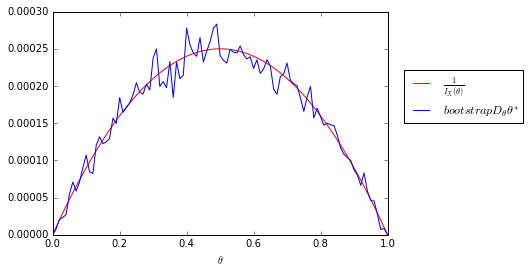

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

N = 1000
def calc_bootstrap_disp(theta) :
    bootstrap_size = 500
    sample = stats.bernoulli.rvs(p=theta, size=N)
    effective_evl_theta = np.mean(sample)
    ssum = 0
    ssum2 = 0
    for i in range(bootstrap_size) :
        sample2 = stats.bernoulli.rvs(p=effective_evl_theta, size=N)
        evl_theta_2 = np.mean(sample2)
        ssum += evl_theta_2;
        ssum2 += evl_theta_2**2
    return ssum2/bootstrap_size - (ssum/bootstrap_size)**2
    
left_bound = 0
right_bound = 1
step = 0.01
OX = np.arange(left_bound, right_bound + step, step)

#из неравенства Рао-Крамера D(theta) >= (1-p)(p) / n 
#для распределения Бернулли
min_disp = [(theta * (1 - theta)) / N for theta in OX]

bootstrap_disp = [calc_bootstrap_disp(theta) for theta in OX]

#plots
plt.plot(OX , min_disp , 'r' , label = r"$\frac{1}{I_{X} (\theta)}$")
plt.plot(OX , bootstrap_disp , 'b', label = r"$bootstrap D_{\theta}\theta ^ {*}}$")
plt.xlabel(r"$\theta$")
plt.legend(loc = (1.05,0.5))
plt.show()

#вывод :
#максимум минимально возможной дисперсии несмещенной оценки достигается при \theta = 0.5 
